# Template for DeepLearning project


## 1. Load Dataset
First, load your dataset and show a few examples to familiarize with the data.
After that, compute a few statisticts, e. g. of the class labels, to check data for imbalance.
Finally, split your dataset into training, validatian and test set.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import models, layers, Sequential, datasets
from KerasConfigService import KerasConfigService
import pandas as pd

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("Type X_train: ", type(x_train.shape))
print("Shape X_train: ", x_train.shape)
print("Shape y_train: ", y_train.shape)
print("Shape X_test: ", x_test.shape)
print("Shape y_test: ", y_test.shape)

Type X_train:  <class 'tuple'>
Shape X_train:  (50000, 32, 32, 3)
Shape y_train:  (50000, 1)
Shape X_test:  (10000, 32, 32, 3)
Shape y_test:  (10000, 1)


In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:

def show_images(x, y, class_labels):
    num_images = np.arange(25)
    plt.figure(figsize=(10, 10))
    for i in num_images:
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i])
        plt.xlabel(class_labels[y[i].item()], color="red")
    plt.show()



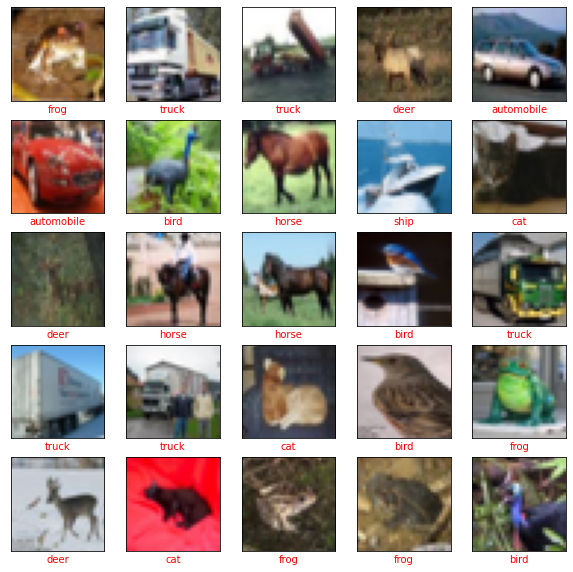

In [6]:
show_images(x_train, y_train, class_labels=classes)

/Users/manuel/Documents/MSE_Projects/deep_learning/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[Text(0, 0, 'airplane'),
  Text(1, 0, 'automobile'),
  Text(2, 0, 'bird'),
  Text(3, 0, 'cat'),
  Text(4, 0, 'deer'),
  Text(5, 0, 'dog'),
  Text(6, 0, 'frog'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'ship'),
  Text(9, 0, 'truck')]]

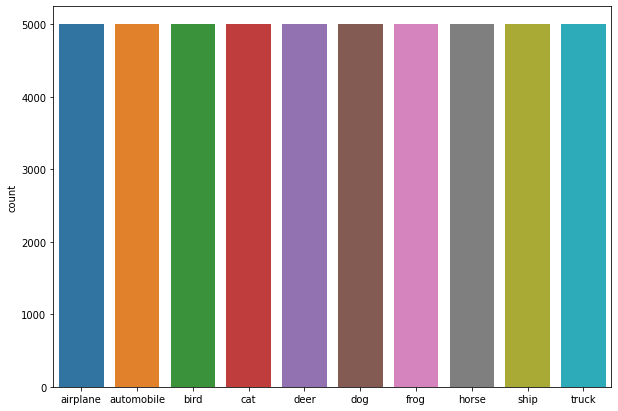

In [7]:
plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)

### Transforming and preparing data
1. Cast type to float
2. normalizing values

In [8]:
x_train =  x_train.astype('float32')   # change the type towards float32
x_test =   x_test.astype('float32')    # idem
x_train /= 255                         # normalize the range to be between 0.0 and 1.0
x_test /=  255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


### One-hot encoding of labels (ground truths)

1. y_train
2. y_test

In [12]:
num_classes = len(set(y_train.flatten()))

print("Num classes:", num_classes, "\n")

print("Before one hot encoding:", y_train[0])

y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)

print("After one hot encoding:", y_train[0])

Num classes: 10 

Before one hot encoding: [6]
After one hot encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## 2. Define Model
Build your model fitting to the dataset (e. g. convolutional network for images, assuming the correct number of pixels and channels) and desired output (e. g. classification)

In [ ]:
import torch
class Model(torch.nn.Module):
    def __init__(self):
        # initialize model layers
        # define optimizer

    def forward(self, x):
        # run input through layers

## 3. Define evaluation function
Implement function to evaluate performance (e. g. classification accuracy) on any of the datasets: the training (for performance tracking)  the validation (for hyperparameter tuning) and test set (for final evaluation).

In [ ]:
def evaluate_model(model, dataloader):
    ## compute performance metrics
    return performance_metrics

## 4. Define training function
Define the training loop (Input: number of epochs, learning rate, ... (other hyperparameters)). Include performance tracking e. g. using wandb.ai or tensorboard.

In [ ]:
def train_model(Model, dataloader, *, epochs=10,learning_rate=0.01):
    ## training loop
    pass

## 5. Perform training runs
Using different choices for the hyperparameters, run the training loop and track the performance online.

## 6. Compare runs
Go to your online performance tracker and make suitable plots to compare the runs.

## 7. Interpret results
Include the comparison plots in the notebook (when possible, using online reference) and discuss the results.